In [326]:
import pandas as pd
import numpy as np

In [327]:
laptop_df = pd.read_csv("laptop_price.csv", encoding_errors='ignore')
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [328]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [329]:
laptop_df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Korzystamy z One hot encoding, by móc wykorzystać dane kategoryczne do modeli predykcyjnych. Zamieniamy dane kategoryczne na dane numeryczne.

In [330]:
dumies_laptop_df = pd.get_dummies(laptop_df, columns = ["Company", "TypeName", "ScreenResolution", "Cpu", "Gpu", "OpSys"])

In [331]:
dumies_laptop_df

,laptop_ID,Product,Inches,Ram,Memory,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,MacBook Pro,13.3,8GB,128GB SSD,1.37kg,1339.69,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,Macbook Air,13.3,8GB,128GB Flash Storage,1.34kg,898.94,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,3,250 G6,15.6,8GB,256GB SSD,1.86kg,575.00,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,MacBook Pro,15.4,16GB,512GB SSD,1.83kg,2537.45,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,5,MacBook Pro,13.3,8GB,256GB SSD,1.37kg,1803.60,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Yoga 500-14ISK,14.0,4GB,128GB SSD,1.8kg,638.00,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1299,1317,Yoga 900-13ISK,13.3,16GB,512GB SSD,1.3kg,1499.00,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1300,1318,IdeaPad 100S-14IBR,14.0,2GB,64GB Flash Storage,1.5kg,229.00,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1301,1319,15-AC110nv (i7-6500U/6GB/1TB/Radeon,15.6,6GB,1TB HDD,2.19kg,764.00,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Poniżej zamieniamy zmienne w kolumnach Ram, Weight i Inches z danych kategorycznych na numeryczne.

In [332]:
dumies_laptop_df['Ram'] = dumies_laptop_df['Ram'].map(lambda x: x.rstrip('GB'))

In [333]:
dumies_laptop_df['Ram'] = dumies_laptop_df['Ram'].astype(int)

In [334]:
dumies_laptop_df['Weight'] = dumies_laptop_df['Weight'].map(lambda x: x.rstrip('kg'))

In [335]:
dumies_laptop_df['Weight'] = dumies_laptop_df['Weight'].astype(float)

In [336]:
dumies_laptop_df['Inches'] = dumies_laptop_df['Inches'].astype(float)

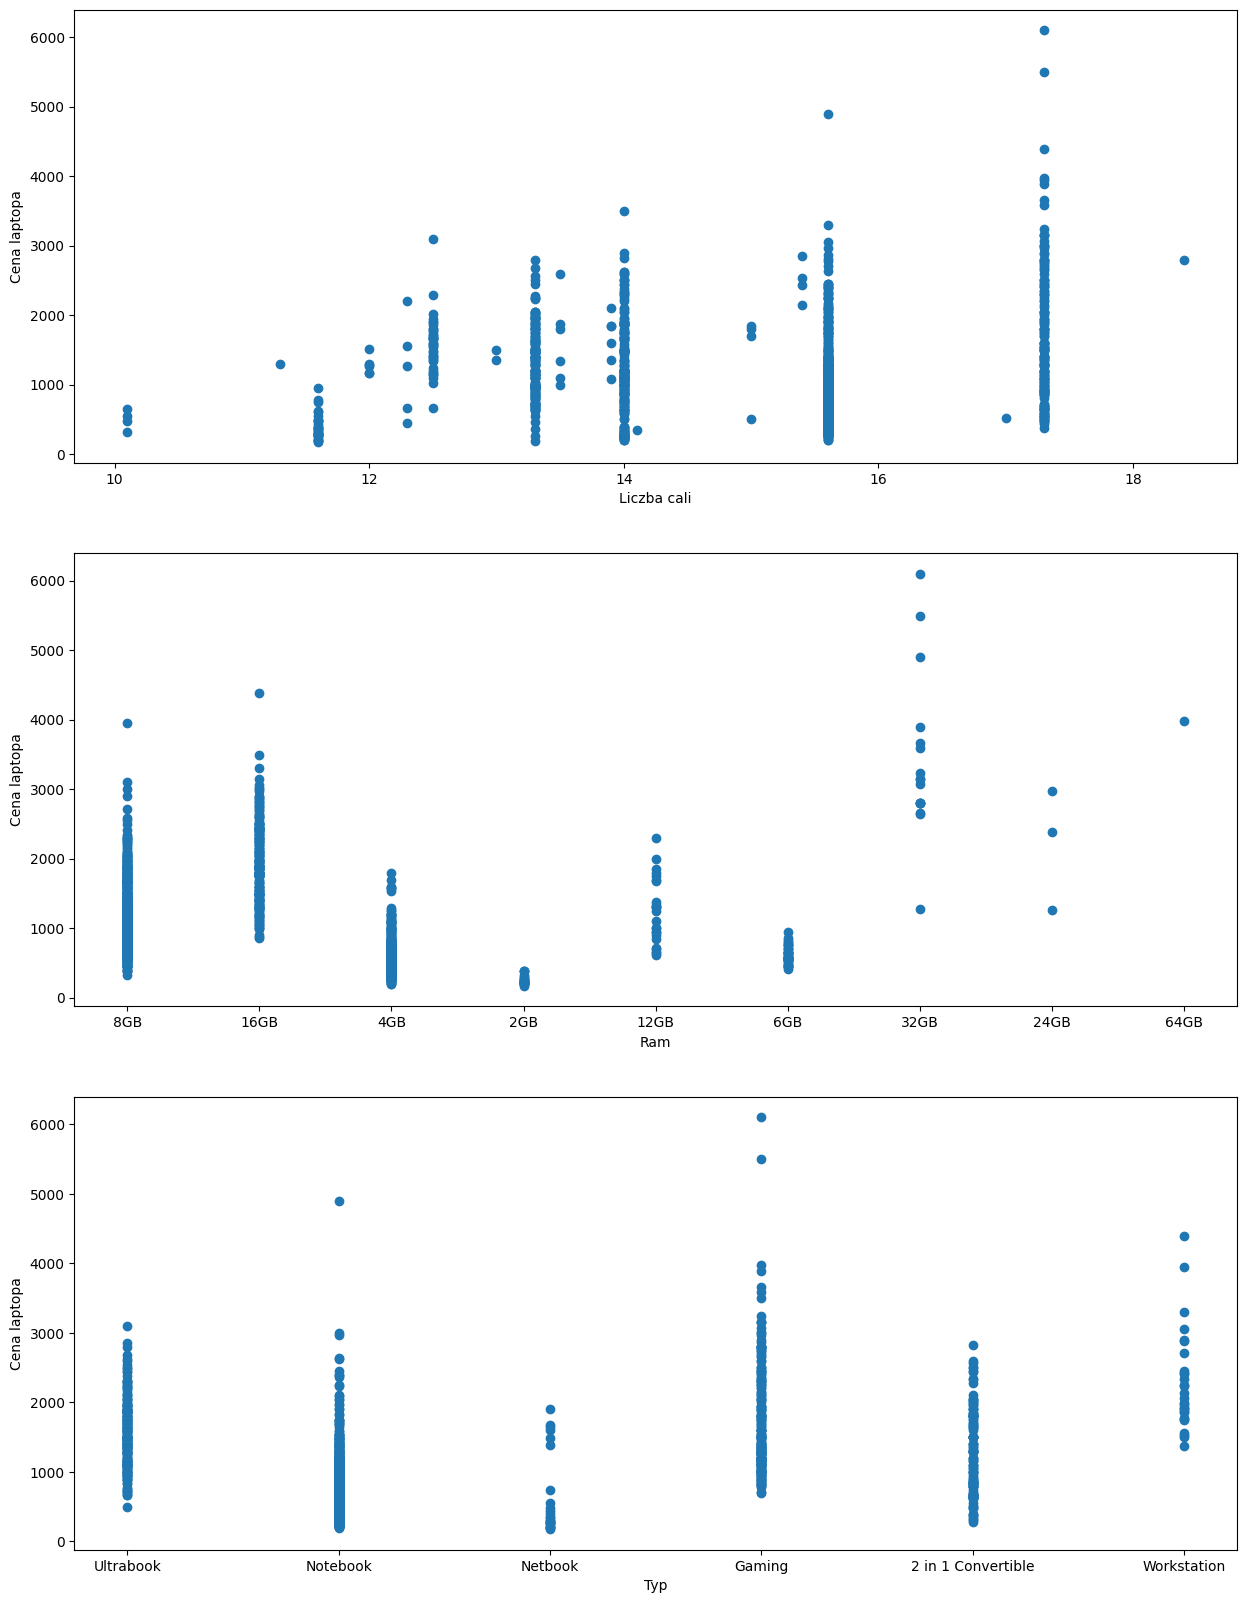

In [337]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15,20))

ax1.set_xlabel("Liczba cali")
ax1.set_ylabel("Cena laptopa")

ax2.set_xlabel("Ram")
ax2.set_ylabel("Cena laptopa")

ax3.set_xlabel("Typ")
ax3.set_ylabel("Cena laptopa")

ax1 = ax1.scatter(laptop_df['Inches'],
        laptop_df['Price_euros'])

ax2 = ax2.scatter(laptop_df['Ram'],
        laptop_df['Price_euros'])

ax3 = ax3.scatter(laptop_df['TypeName'],
        laptop_df['Price_euros'])

Dodajemy nową kolumnę "has_ssd", by wyciągnąć z DataFrama'a informację, które laptopy miały dyski SSD

In [338]:
dumies_laptop_df["has_ssd"] = dumies_laptop_df["Memory"].apply(lambda x: 1 if "SSD" in x else 0)

Ustalamy nasze zmienne X i y, które będzimy wykorzystywać do predykcji

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = dumies_laptop_df[['Inches', 'Ram', 'OpSys_macOS', 'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Mac OS X', 'OpSys_Linux', 'OpSys_Android',
       'OpSys_Windows 10 S', 'OpSys_Chrome OS', 'OpSys_Windows 7', 'has_ssd']]
y = dumies_laptop_df['Price_euros']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Regresja liniowa

In [242]:
dumies_laptop_df

,Product,Inches,Ram,Memory,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,has_ssd
0,MacBook Pro,13.3,8,128GB SSD,1.37,1339.69,False,True,False,False,...,False,False,False,False,False,False,False,False,True,1
1,Macbook Air,13.3,8,128GB Flash Storage,1.34,898.94,False,True,False,False,...,False,False,False,False,False,False,False,False,True,0
2,250 G6,15.6,8,256GB SSD,1.86,575.00,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
3,MacBook Pro,15.4,16,512GB SSD,1.83,2537.45,False,True,False,False,...,False,False,False,False,False,False,False,False,True,1
4,MacBook Pro,13.3,8,256GB SSD,1.37,1803.60,False,True,False,False,...,False,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Yoga 500-14ISK,14.0,4,128GB SSD,1.80,638.00,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
1299,Yoga 900-13ISK,13.3,16,512GB SSD,1.30,1499.00,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
1300,IdeaPad 100S-14IBR,14.0,2,64GB Flash Storage,1.50,229.00,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
1301,15-AC110nv (i7-6500U/6GB/1TB/Radeon,15.6,6,1TB HDD,2.19,764.00,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0


In [343]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [344]:
y_pred = model.predict(X_test)

In [345]:
from sklearn.metrics import r2_score

In [346]:
r2_score(y_test, y_pred)

0.6251834686360105

Predykcja na drzewie

In [347]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [348]:
y_pred = model.predict(X_test)

In [349]:
r2_score(y_test, y_pred)

0.5936871918980411

In [350]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
for train, test in cv.split(X,y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]
    print(X_train.shape, X_test.shape)

(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (

(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (

(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (1, 12)
(1302, 12) (

Standaryzacja wyników

In [351]:
from sklearn.preprocessing import StandardScaler

In [352]:
sc = StandardScaler()

In [353]:
X_train_sc = sc.fit_transform(X_train)

In [354]:
X_test_sc = sc.transform(X_test)

In [355]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [356]:
models = [
    {'model': LinearRegression()},
    {'model': Ridge()},
    {'model': Ridge(alpha=0.2)},
    {'model': Ridge(alpha=0.9)},
    {'model': Lasso()},
    {'model': Lasso(alpha=0.2)},
    {'model': Lasso(alpha=0.9)},
    {'model': ElasticNet(alpha=0.2, l1_ratio=0.1)},
    {'model': ElasticNet(alpha=0.2, l1_ratio=0.7)},
    {'model': ElasticNet()},
    {'model': DecisionTreeRegressor()}
]

In [357]:
from sklearn.model_selection import KFold
def train_model_cv(train_X, train_y, test_X, test_y, _model):
    model = _model
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    return r2_score(test_y, pred_y)
test_scores = []
for model in models:
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = []
    for train, test in cv.split(X_train, y_train):
        X_train_cv, y_train_cv = X_train.iloc[train], y_train.iloc[train]
        X_test_cv, y_test_cv = X_train.iloc[test], y_train.iloc[test]
        score.append(train_model_cv(X_train_cv, y_train_cv, X_test_cv, y_test_cv, model['model']))
    test_scores.append(f"{model['model']} , r2: , {sum(score) / len(score)}")

Przedstawienie wyników na różnych modelach predykcyjnych.

In [358]:
test_scores

['LinearRegression() , r2: , 0.6380893840539614',
 'Ridge() , r2: , 0.638334611280819',
 'Ridge(alpha=0.2) , r2: , 0.6381794400971639',
 'Ridge(alpha=0.9) , r2: , 0.6383248730641258',
 'Lasso() , r2: , 0.6373226930197199',
 'Lasso(alpha=0.2) , r2: , 0.6381338202344369',
 'Lasso(alpha=0.9) , r2: , 0.637459903159385',
 'ElasticNet(alpha=0.2, l1_ratio=0.1) , r2: , 0.6028994562333494',
 'ElasticNet(alpha=0.2, l1_ratio=0.7) , r2: , 0.6212515929430639',
 'ElasticNet() , r2: , 0.5829451132404088',
 'DecisionTreeRegressor() , r2: , 0.6403427237702324']

Po standaryzacji najlepszym modelem okazł się model drzewa decyzyjnego.